In [6]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# create a set of random longitude and latitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [9]:
# import citipy module
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [13]:
# Import datetime module from the datetime library
from datetime import datetime


In [14]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | strelka
Processing Record 2 of Set 1 | sao joao do piaui
Processing Record 3 of Set 1 | hurghada
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | aguas belas
Processing Record 10 of Set 1 | san quintin
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | thompson
Proce

Processing Record 38 of Set 4 | shimanovsk
Processing Record 39 of Set 4 | santa cruz
Processing Record 40 of Set 4 | oksfjord
Processing Record 41 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 42 of Set 4 | ereymentau
Processing Record 43 of Set 4 | yar-sale
Processing Record 44 of Set 4 | shemonaikha
Processing Record 45 of Set 4 | muravlenko
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | namibe
Processing Record 48 of Set 4 | soe
Processing Record 49 of Set 4 | paita
Processing Record 50 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | tawkar
City not found. Skipping...
Processing Record 2 of Set 5 | ajdabiya
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 5 | awjilah
Processing Record 6 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 5 | olafsvik
Processing Record 8 o

Processing Record 23 of Set 8 | dandong
Processing Record 24 of Set 8 | tanda
Processing Record 25 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 26 of Set 8 | samfya
Processing Record 27 of Set 8 | urulga
City not found. Skipping...
Processing Record 28 of Set 8 | verkhnevilyuysk
Processing Record 29 of Set 8 | misawa
Processing Record 30 of Set 8 | alta floresta
Processing Record 31 of Set 8 | carnarvon
Processing Record 32 of Set 8 | khonuu
City not found. Skipping...
Processing Record 33 of Set 8 | hazleton
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | sosua
Processing Record 36 of Set 8 | alpena
Processing Record 37 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 38 of Set 8 | sumilao
Processing Record 39 of Set 8 | ronde
Processing Record 40 of Set 8 | santiago del estero
Processing Record 41 of Set 8 | halifax
Processing Record 42 of Set 8 | acapulco
Processing Record 43 of Set 8 | torbay
Processing Record 44 o

Processing Record 7 of Set 12 | kichera
Processing Record 8 of Set 12 | pangkalanbuun
Processing Record 9 of Set 12 | palaikastron
Processing Record 10 of Set 12 | dombasle-sur-meurthe
Processing Record 11 of Set 12 | rio muerto
Processing Record 12 of Set 12 | berlevag
Processing Record 13 of Set 12 | puri
Processing Record 14 of Set 12 | vani
Processing Record 15 of Set 12 | vilyuysk
Processing Record 16 of Set 12 | portsmouth
Processing Record 17 of Set 12 | weligama
Processing Record 18 of Set 12 | stranda
Processing Record 19 of Set 12 | shubarshi
Processing Record 20 of Set 12 | ugoofaaru
Processing Record 21 of Set 12 | shirokiy
Processing Record 22 of Set 12 | ishigaki
Processing Record 23 of Set 12 | kampot
Processing Record 24 of Set 12 | huazolotitlan
City not found. Skipping...
Processing Record 25 of Set 12 | jurado
Processing Record 26 of Set 12 | albion
Processing Record 27 of Set 12 | chunskiy
Processing Record 28 of Set 12 | astaneh-ye ashrafiyeh
Processing Record 29 o

In [15]:
len(city_data)

543

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Strelka,58.0728,93.0344,-2.31,91,100,6.46,RU,2021-01-09 18:19:42
1,Sao Joao Do Piaui,-8.3581,-42.2467,92.37,42,100,6.17,BR,2021-01-09 18:19:42
2,Hurghada,27.2574,33.8129,69.80,52,0,13.80,EG,2021-01-09 18:19:43
3,Ushuaia,-54.8000,-68.3000,60.80,31,40,5.75,AR,2021-01-09 18:19:43
4,Albany,42.6001,-73.9662,30.00,54,100,3.00,US,2021-01-09 18:16:07
5,Barrow,71.2906,-156.7887,-2.20,78,90,8.05,US,2021-01-09 18:19:43
6,Tuktoyaktuk,69.4541,-133.0374,6.80,85,75,9.22,CA,2021-01-09 18:19:44
7,Bredasdorp,-34.5322,20.0403,69.80,64,0,12.66,ZA,2021-01-09 18:19:44
8,Aguas Belas,-9.1114,-37.1231,92.64,30,58,10.87,BR,2021-01-09 18:17:02
9,San Quintin,30.4833,-115.9500,62.55,58,0,7.61,MX,2021-01-09 18:19:44


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Strelka,RU,2021-01-09 18:19:42,58.0728,93.0344,-2.31,91,100,6.46
1,Sao Joao Do Piaui,BR,2021-01-09 18:19:42,-8.3581,-42.2467,92.37,42,100,6.17
2,Hurghada,EG,2021-01-09 18:19:43,27.2574,33.8129,69.80,52,0,13.80
3,Ushuaia,AR,2021-01-09 18:19:43,-54.8000,-68.3000,60.80,31,40,5.75
4,Albany,US,2021-01-09 18:16:07,42.6001,-73.9662,30.00,54,100,3.00
5,Barrow,US,2021-01-09 18:19:43,71.2906,-156.7887,-2.20,78,90,8.05
6,Tuktoyaktuk,CA,2021-01-09 18:19:44,69.4541,-133.0374,6.80,85,75,9.22
7,Bredasdorp,ZA,2021-01-09 18:19:44,-34.5322,20.0403,69.80,64,0,12.66
8,Aguas Belas,BR,2021-01-09 18:17:02,-9.1114,-37.1231,92.64,30,58,10.87
9,San Quintin,MX,2021-01-09 18:19:44,30.4833,-115.9500,62.55,58,0,7.61


In [18]:
# Creat the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

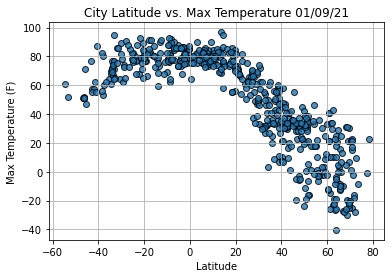

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

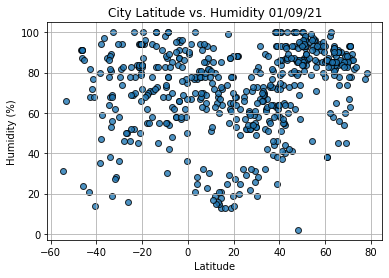

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

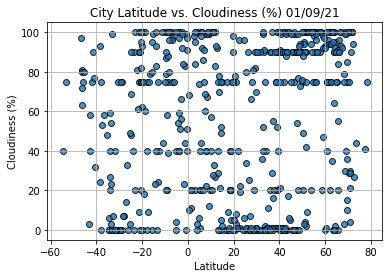

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

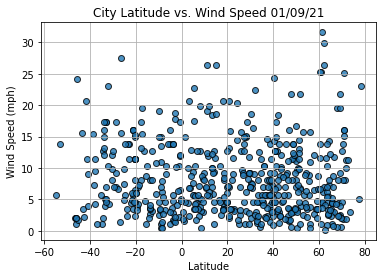

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()